# Social Networks and Recommendation Systems
## Detecting networks communities

Student: Karina Tiurina (335943)

Date: 06.01.2025

In [6]:
from community_detection import hierarchical_clustering, hierarchical_clustering_unc
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import timeit

# Competition graphs

In [7]:
# Helper functions
def read_graph(name):
  file_path = f'data/{name}.xlsx'
  df = pd.read_excel(file_path, header=None)
  adjacency_matrix = df[0].str.split(",", expand=True).astype(int)
  G = nx.from_numpy_array(adjacency_matrix.to_numpy(), create_using=nx.Graph)
  mapping = {node: node + 1 for node in G.nodes}
  G = nx.relabel_nodes(G, mapping)
  return G

def draw_graph(G, name):
  pos = nx.spring_layout(G, seed=2025)
  nx.draw(G, pos, with_labels=False, node_size=100)
  plt.title(f"{name}")
  plt.show()

def draw_graph_with_clusters(graph, clusters, name):
  cluster_colors = {}
  for i, cluster in enumerate(clusters):
      for node in cluster:
          cluster_colors[node] = i 

  node_colors = [cluster_colors[ni] for ni, _ in enumerate(graph.nodes())]
  pos = nx.spring_layout(graph, seed=2025)
  nx.draw(graph, pos, with_labels=False, node_color=node_colors, cmap=plt.cm.tab20b, node_size=100, font_size=12)
  plt.title(f"{name}")
  plt.show()

def save_clusters(graph, clusters, name):
  data = []
  for i, node in enumerate(list(graph.nodes())):
    for cluster_i, cluster in enumerate(clusters):
      if i in cluster:
        data.append([node, cluster_i + 1])
        break
  df_clusters = pd.DataFrame(data)
  df_clusters.to_csv(f'KaTi_results/{name}.csv', header=False, index=False, sep=',')

### 1. D1-K=2

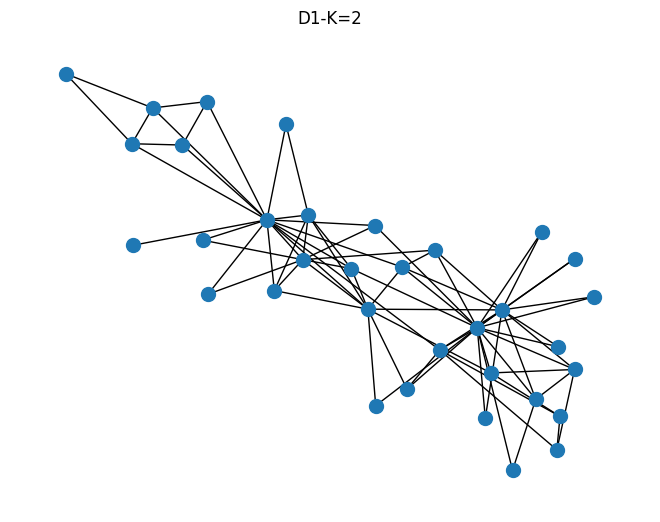

In [9]:
name = "D1-K=2"
G1 = read_graph(name)
draw_graph(G1, name)

## 2. D1-UNC

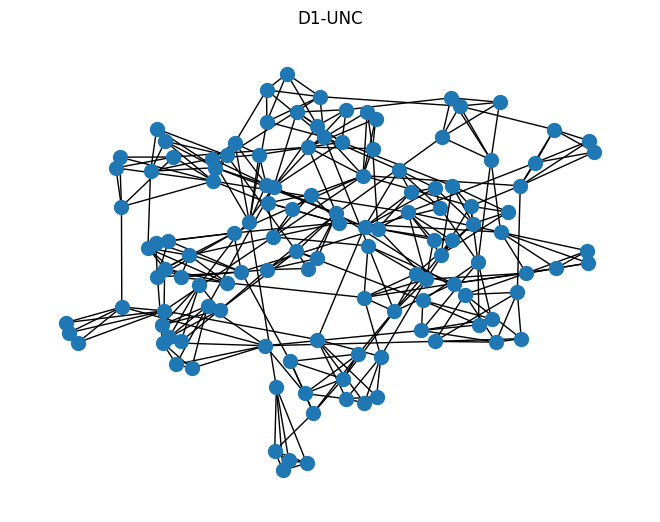

In [10]:
name = "D1-UNC"
G2 = read_graph(name)
draw_graph(G2, name)

## 3. D2-K=7

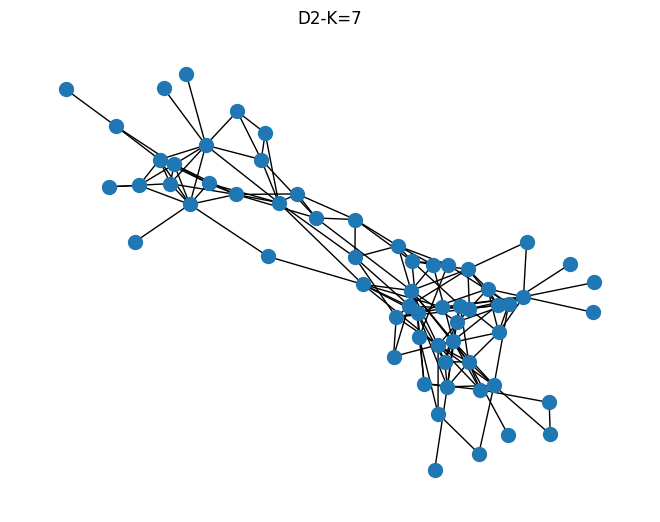

In [11]:
name = "D2-K=7"
G3 = read_graph(name)
draw_graph(G3, name)

## 4. D2-UNC

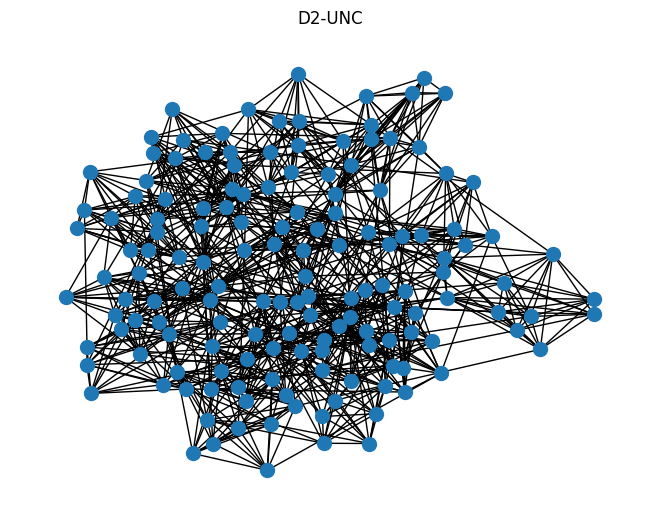

In [12]:
name = "D2-UNC"
G4 = read_graph(name)
draw_graph(G4, name)

## 5. D3-K=12

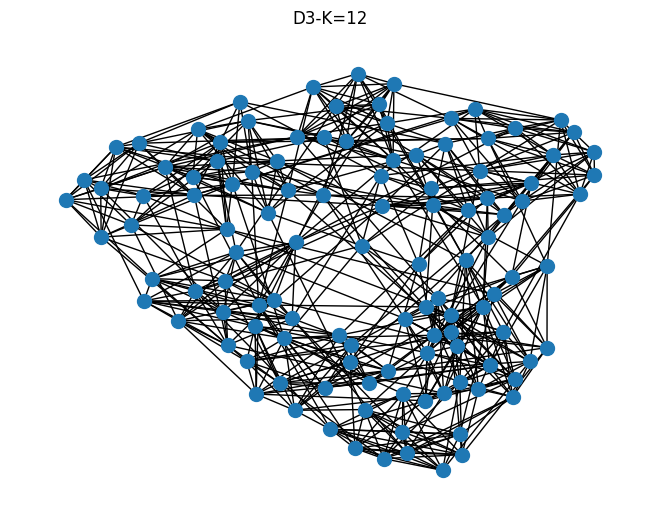

In [13]:
name = "D3-K=12"
G5 = read_graph(name)
draw_graph(G5, name)

## 6. D3-UNC

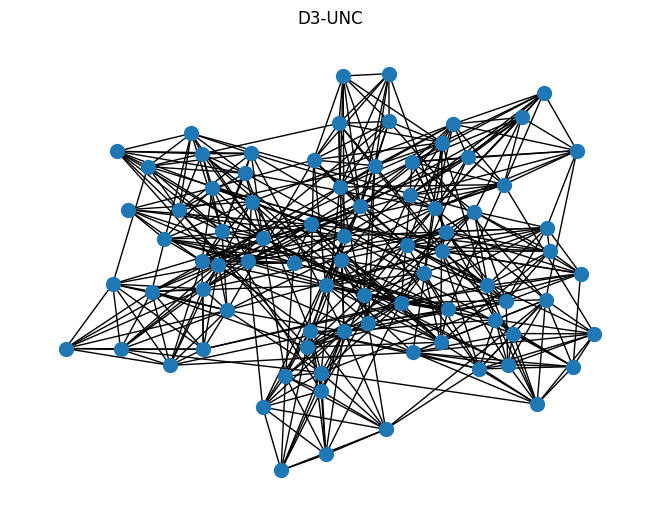

In [14]:
name = "D3-UNC"
G6 = read_graph(name)
draw_graph(G6, name)

## Testing community detection

In [15]:
# This cell runs community detection 5 times for each network to calc average execution time
def time_G1():
  name = "D1-K=2"
  G1 = read_graph(name)
  hierarchical_clustering(G1, 2)

def time_G2():
  name = "D1-UNC"
  G2 = read_graph(name)
  hierarchical_clustering_unc(G2)

def time_G3():
  name = "D2-K=7"
  G3 = read_graph(name)
  hierarchical_clustering(G3, 7)

def time_G4():
  name = "D2-UNC"
  G4 = read_graph(name)
  hierarchical_clustering_unc(G4)

def time_G5():
  name = "D3-K=12"
  G5 = read_graph(name)
  hierarchical_clustering(G5, 12)

def time_G6():
  name = "D3-UNC"
  G6 = read_graph(name)
  hierarchical_clustering_unc(G6)

repeat = 5

time_1 = round(timeit.timeit(time_G1, globals=globals(), number=repeat) / repeat, 4)
time_2 = round(timeit.timeit(time_G2, globals=globals(), number=repeat) / repeat, 4)
time_3 = round(timeit.timeit(time_G3, globals=globals(), number=repeat) / repeat, 4)
time_4 = round(timeit.timeit(time_G4, globals=globals(), number=repeat) / repeat, 4)
time_5 = round(timeit.timeit(time_G5, globals=globals(), number=repeat) / repeat, 4)
time_6 = round(timeit.timeit(time_G6, globals=globals(), number=repeat) / repeat, 4)

execution_time = [['D1-K=2.xlsx', f"{time_1}s"], ['D1-UNC.xlsx', f"{time_2}s"],
                         ['D2-K=7.xlsx', f"{time_3}s"], ['D2-UNC.xlsx', f"{time_4}s"],
                         ['D3-K=12.xlsx', f"{time_5}s"], ['D3-UNC.xlsx', f"{time_6}s"]]
df = pd.DataFrame(execution_time)

header_string = "Karina Tiurina\nhttps://github.com/KarinaTiurina/community_detection"

with open('KaTi_results/description.txt', 'w') as file:
    file.write(header_string + '\n')
    for row in df.values:
      file.write(','.join(map(str, row)) + '\n') 
print("Average execution time:")
df

Average execution time:


,0,1
0,D1-K=2.xlsx,0.3638s
1,D1-UNC.xlsx,58.097s
2,D2-K=7.xlsx,4.716s
3,D2-UNC.xlsx,120.6518s
4,D3-K=12.xlsx,39.1837s
5,D3-UNC.xlsx,9.9663s


Number of clusters: 2


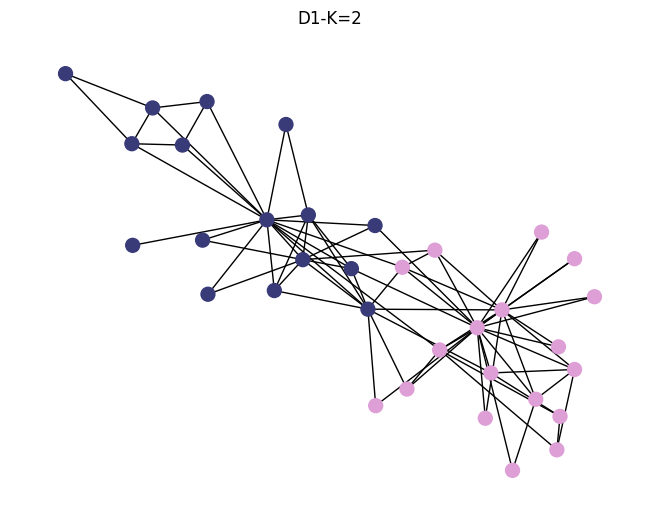

In [16]:
name = "D1-K=2"
G1 = read_graph(name)
clusters = hierarchical_clustering(G1, 2)
save_clusters(G1, clusters, name)
print(f"Number of clusters: {len(clusters)}")
draw_graph_with_clusters(G1, clusters, name)

Number of clusters: 25


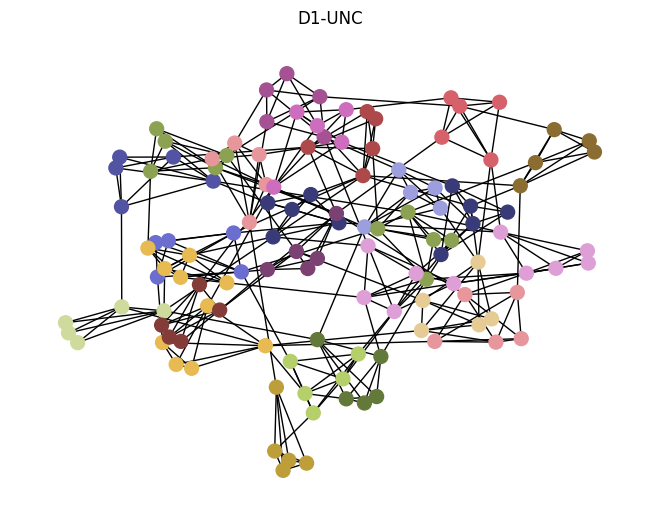

In [17]:
name = "D1-UNC"
G2 = read_graph(name)
clusters = hierarchical_clustering_unc(G2)
save_clusters(G2, clusters, name)
print(f"Number of clusters: {len(clusters)}")
draw_graph_with_clusters(G2, clusters, name)

Number of clusters: 7


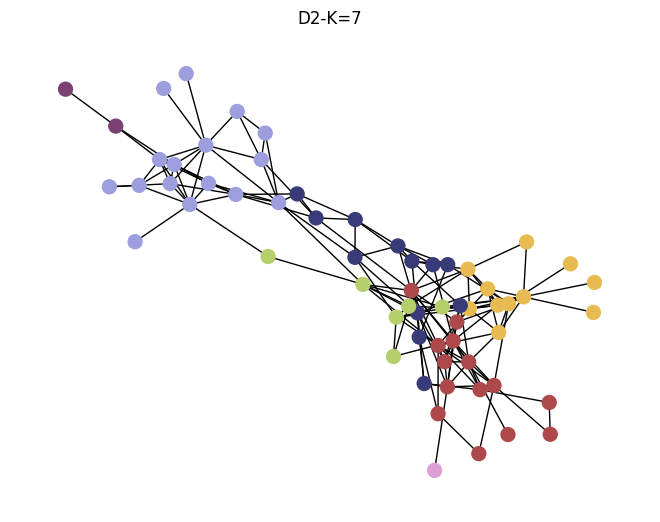

In [18]:
name = "D2-K=7"
G3 = read_graph(name)
clusters = hierarchical_clustering(G3, 7)
save_clusters(G3, clusters, name)
print(f"Number of clusters: {len(clusters)}")
draw_graph_with_clusters(G3, clusters, name)

Number of clusters: 15


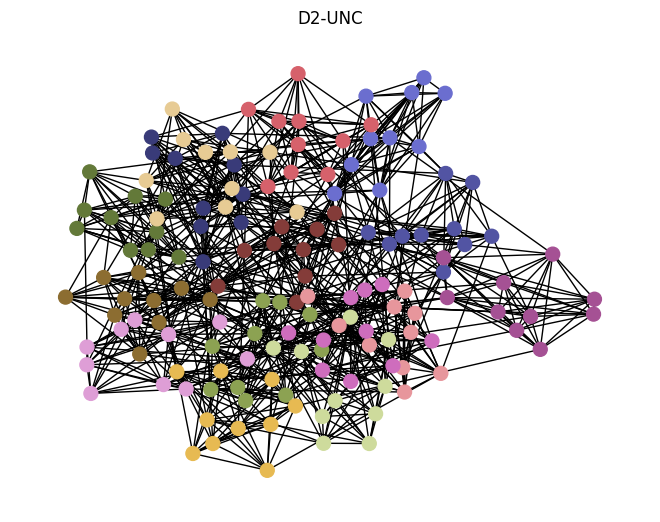

In [19]:
name = "D2-UNC"
G4 = read_graph(name)
clusters = hierarchical_clustering_unc(G4)
save_clusters(G4, clusters, name)
print(f"Number of clusters: {len(clusters)}")
draw_graph_with_clusters(G4, clusters, name)

Number of clusters: 12


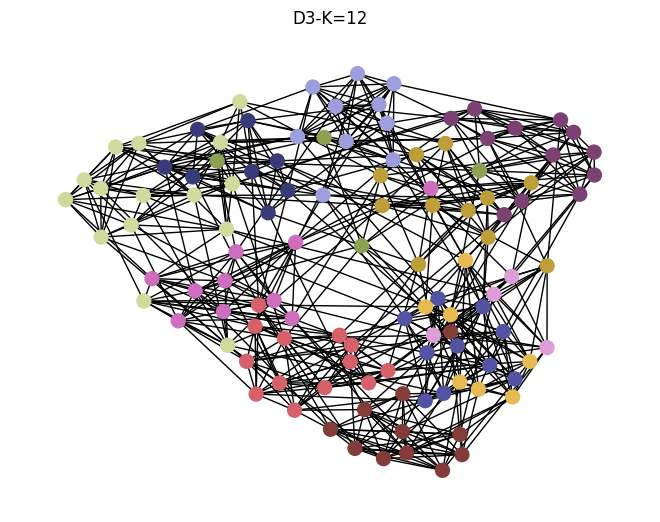

In [20]:
name = "D3-K=12"
G5 = read_graph(name)
clusters = hierarchical_clustering(G5, 12)
save_clusters(G5, clusters, name)
print(f"Number of clusters: {len(clusters)}")
draw_graph_with_clusters(G5, clusters, name)

Number of clusters: 9


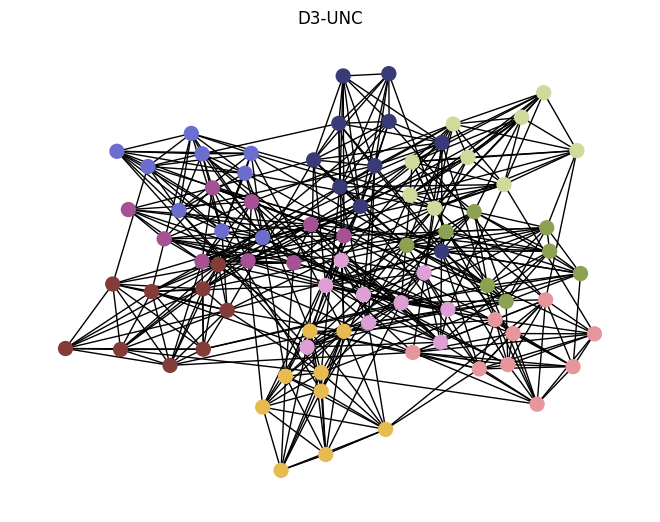

In [21]:
name = "D3-UNC"
G6 = read_graph(name)
clusters = hierarchical_clustering_unc(G6)
save_clusters(G6, clusters, name)
print(f"Number of clusters: {len(clusters)}")
draw_graph_with_clusters(G6, clusters, name)